# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&q=" +city+ "&units="+units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1  

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt'] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | baringo
Processing Record 3 of Set 1 | ola
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | kourou
Processing Record 8 of Set 1 | atafu village
Processing Record 9 of Set 1 | callao
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | mirny
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | smithers
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | tanrake village
City not found. Skipping...
Processing Record 19 of Set 1 | castillos
Processing Record 20 of Set 1 | staraya russa
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | port m

Processing Record 39 of Set 4 | tual
Processing Record 40 of Set 4 | ancud
Processing Record 41 of Set 4 | benghazi
Processing Record 42 of Set 4 | astrakhan
Processing Record 43 of Set 4 | terrace
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | opuwo
Processing Record 46 of Set 4 | lagos
Processing Record 47 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 48 of Set 4 | lago da pedra
Processing Record 49 of Set 4 | leh
Processing Record 0 of Set 5 | yelizovo
Processing Record 1 of Set 5 | ceeldheer
Processing Record 2 of Set 5 | haiku-pauwela
Processing Record 3 of Set 5 | mtinko
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | cockburn town
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | silistra
Processing Record 8 of Set 5 | nasir
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | vytegra
Processing Record 11 of Set 5 | bardai
Processing Record 12

Processing Record 33 of Set 8 | brookings
Processing Record 34 of Set 8 | kapuskasing
Processing Record 35 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 36 of Set 8 | general conesa
Processing Record 37 of Set 8 | fada
Processing Record 38 of Set 8 | cedral
Processing Record 39 of Set 8 | karukh
Processing Record 40 of Set 8 | torbat-e jam
Processing Record 41 of Set 8 | morehead city
Processing Record 42 of Set 8 | ouarzazat
Processing Record 43 of Set 8 | le vauclin
Processing Record 44 of Set 8 | dakhla
Processing Record 45 of Set 8 | camapua
Processing Record 46 of Set 8 | vanimo
Processing Record 47 of Set 8 | mata-utu
Processing Record 48 of Set 8 | hami
Processing Record 49 of Set 8 | ngambe
Processing Record 0 of Set 9 | galle
Processing Record 1 of Set 9 | wacheng
Processing Record 2 of Set 9 | betare oya
Processing Record 3 of Set 9 | labasa
Processing Record 4 of Set 9 | limoux
Processing Record 5 of Set 9 | wanning
Processing Record 6 of Set 9 | a

Processing Record 25 of Set 12 | sao vicente
Processing Record 26 of Set 12 | waspan
Processing Record 27 of Set 12 | asau
Processing Record 28 of Set 12 | mandalgovi
Processing Record 29 of Set 12 | aljezur
Processing Record 30 of Set 12 | usinsk
Processing Record 31 of Set 12 | sambava
Processing Record 32 of Set 12 | torghay
Processing Record 33 of Set 12 | alta
Processing Record 34 of Set 12 | kulia village
City not found. Skipping...
Processing Record 35 of Set 12 | kanker
Processing Record 36 of Set 12 | doume
Processing Record 37 of Set 12 | ghormach
Processing Record 38 of Set 12 | enriquillo
Processing Record 39 of Set 12 | beatrice
Processing Record 40 of Set 12 | suomussalmi
Processing Record 41 of Set 12 | vylkove
Processing Record 42 of Set 12 | yaren
Processing Record 43 of Set 12 | howrah
Processing Record 44 of Set 12 | gizo
Processing Record 45 of Set 12 | auki
Processing Record 46 of Set 12 | benguela
Processing Record 47 of Set 12 | michigan city
Processing Record 48

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,25.09,69,75,4.63,US,1683859428
1,baringo,0.4667,35.9667,19.11,71,35,2.67,KE,1683859429
2,ola,59.5833,151.2833,7.86,76,53,2.71,RU,1683859429
3,port elizabeth,-33.9180,25.5701,14.89,91,20,7.72,ZA,1683859429
4,papatowai,-46.5619,169.4708,11.30,90,100,4.24,NZ,1683859429


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,25.09,69,75,4.63,US,1683859428
1,baringo,0.4667,35.9667,19.11,71,35,2.67,KE,1683859429
2,ola,59.5833,151.2833,7.86,76,53,2.71,RU,1683859429
3,port elizabeth,-33.9180,25.5701,14.89,91,20,7.72,ZA,1683859429
4,papatowai,-46.5619,169.4708,11.30,90,100,4.24,NZ,1683859429


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

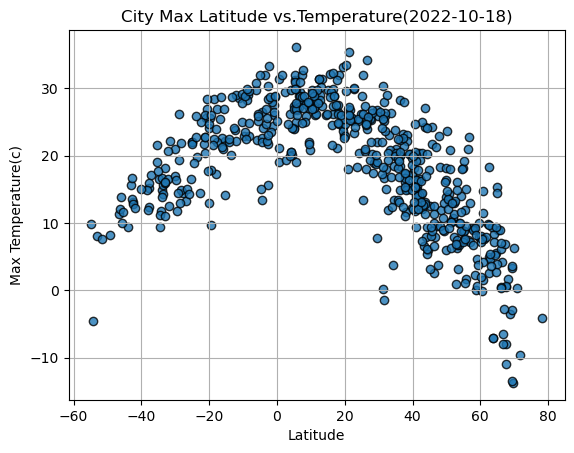

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor="black", linewidth=1, marker="o", alpha=0.8) 

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Temperature(2022-10-18)") 
plt.ylabel("Max Temperature(c)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

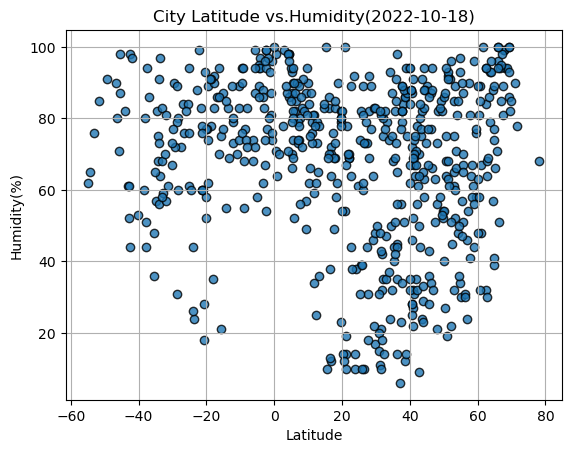

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs.Humidity(2022-10-18)") 
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

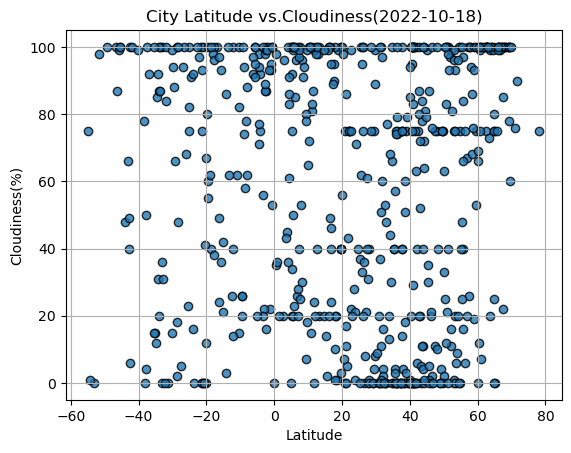

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs.Cloudiness(2022-10-18)") 
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

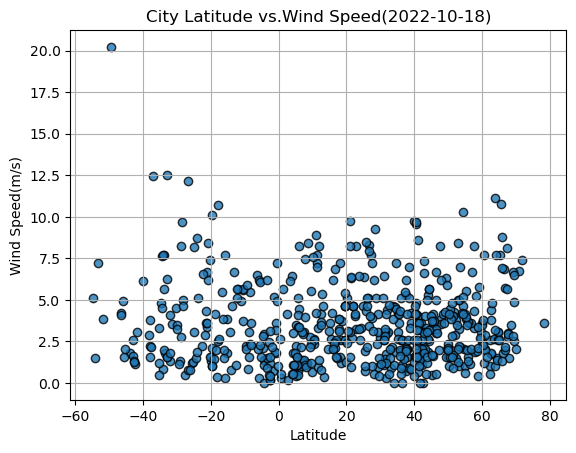

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs.Wind Speed(2022-10-18)") 
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression_plot_generator(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Generate slope of intercept regression
    regress_values = x_values * slope + intercept
    
    # Create slope intercept equation string
    slope_intercept = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig, ax1 = plt.subplots(figsize=(6,6))
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label,fontsize=7)
    plt.ylabel(y_label,fontsize=7)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(slope_intercept, text_coordinates, fontsize=10, color="red")
    
    # Show r square value
    print(f"The r-value is: {rvalue}")
     

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,25.09,69,75,4.63,US,1683859428
1,baringo,0.4667,35.9667,19.11,71,35,2.67,KE,1683859429
2,ola,59.5833,151.2833,7.86,76,53,2.71,RU,1683859429
5,ust-nera,64.5667,143.2000,5.56,57,100,1.50,RU,1683859430
6,kourou,5.1552,-52.6478,24.03,93,92,2.25,GF,1683859430


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port elizabeth,-33.9180,25.5701,14.89,91,20,7.72,ZA,1683859429
4,papatowai,-46.5619,169.4708,11.30,90,100,4.24,NZ,1683859429
7,atafu village,-8.5421,-172.5159,29.03,77,58,5.50,TK,1683859430
8,callao,-12.0667,-77.1500,22.16,73,100,5.66,PE,1683859430
9,adamstown,-25.0660,-130.1015,22.03,61,100,8.21,PN,1683859205


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8310698972472481


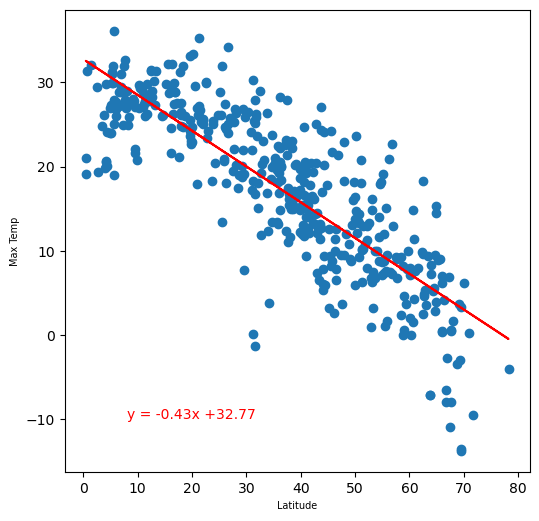

In [21]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Max Temp", "Northern", (8, -10))
plt.show()

The r-value is: 0.7815984150145154


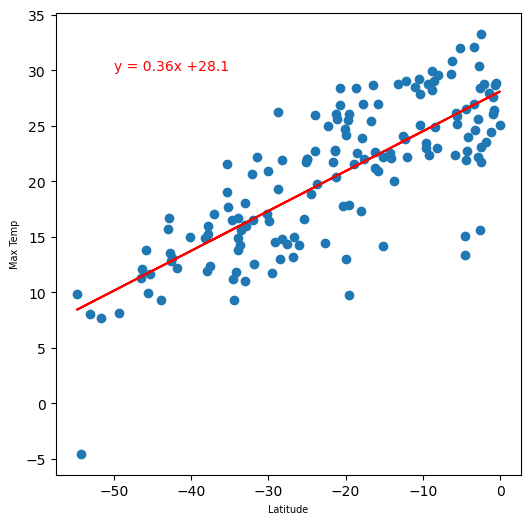

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Max Temp", "Southern", (-50, 30))
plt.show()

**Discussion about the linear relationship:** As we move from equator towards northern hemisphere, temperature drops in a linnear way for increase in latitude and as we move towards sourthern hemisphere temperature rises for latitude increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005611537077530512


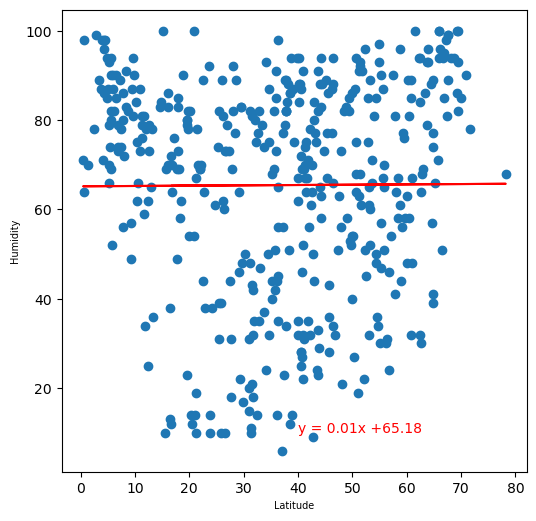

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Humidity", "Northern", (40, 10))
plt.show()

The r-value is: 0.24044025658384036


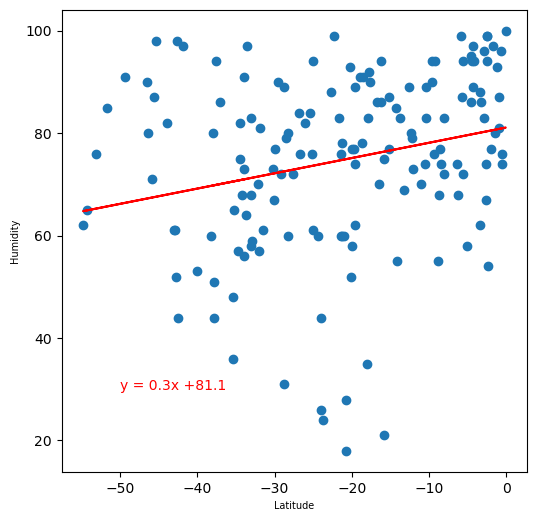

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Humidity", "Southern", (-50, 30))
plt.show()

**Discussion about the linear relationship:**  As we move from equator towards northern hemisphere, humidity slightly varied  in a linnear way for increase in latitude and as we move towards sourthern hemisphere humidity increases for latitude increase.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08216179467900421


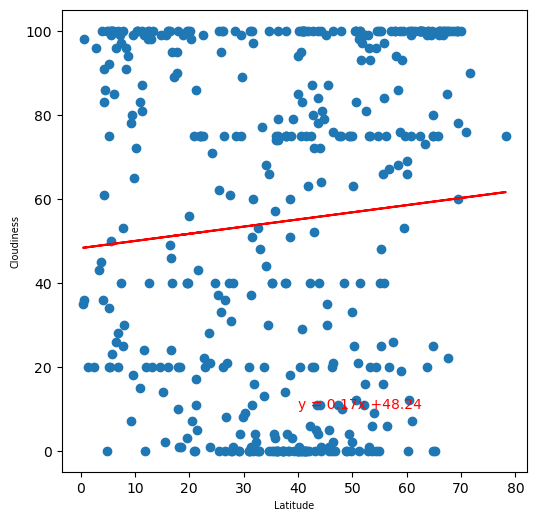

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Cloudiness", "Northern", (40, 10))
plt.show()

The r-value is: 0.13949684607111895


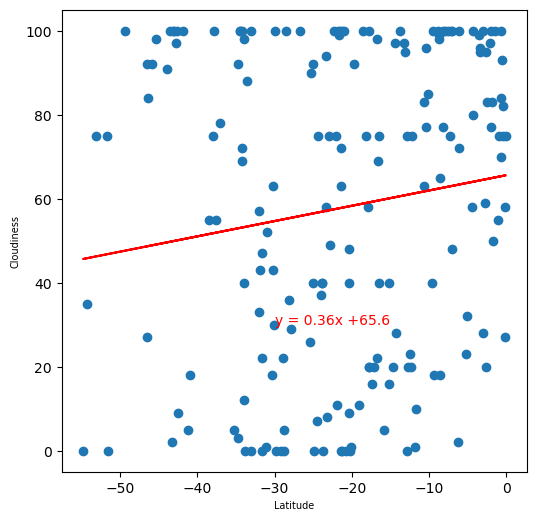

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-30, 30))
plt.show()

**Discussion about the linear relationship:**  As we move from equator towards northern hemisphere, cloudiness slightly rises in a linnear way for increase in latitude and as we move towards sourthern hemisphere cloudiness rises for latitude increase.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07369504969736915


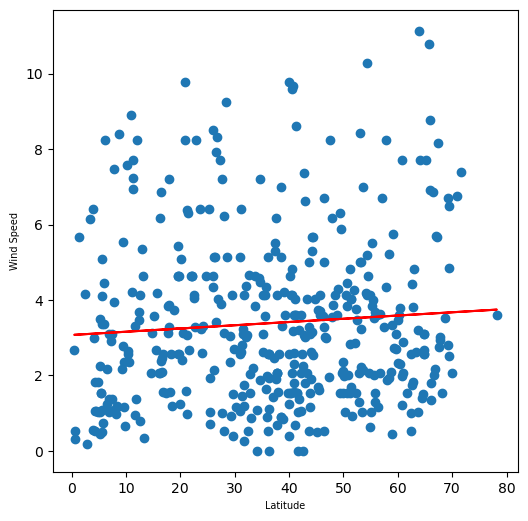

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Wind Speed", "Northern", (10, 12))
plt.show()

The r-value is: -0.21014807085510465


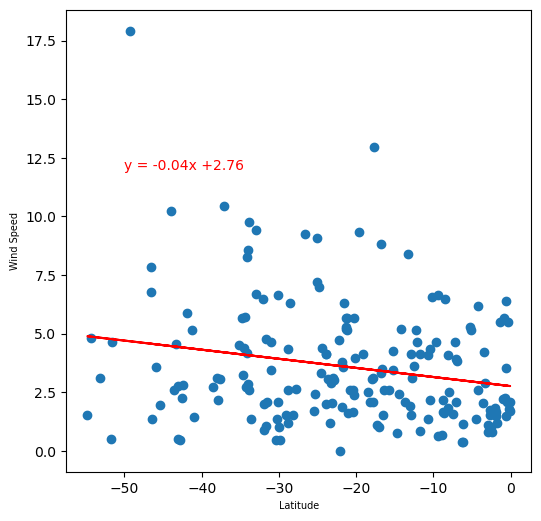

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression_plot_generator(x_values, y_values, "Latitude", "Wind Speed", "Southern", (-50, 12))
plt.show()

**Discussion about the linear relationship:**  As we move from equator towards northern hemisphere, wind slightly drops in a linnear way for increase in latitude and as we move towards sourthern hemisphere wind decreases for latitude increase.